In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
# sys.path.append(r'E:/0code')
sys.path.append(r'/BIGDATA1/nsccgz_yfdu_1/asc19/wyf/0code/mylearn')
sys.path.append(r'/BIGDATA1/nsccgz_yfdu_1/asc19/wyf/0code')
# sys.path.append('/Users/yanbin/Documents/Projects/AI-Middle-Project/')
# sys.path.append('/Users/yanbin/Documents/Projects/mylearn')

# sys.path.append('/home/wyf/0code/AI-Middle-Project/')
# sys.path.append('/home/wyf/0code/mylearn')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from logger import get_logger
from neural_network import MLPClassifier
from pyml.model_selection import KFold
from pyml.model_selection import ShuffleSplit
from pyml.metrics.classification import precision_score


mylogger = get_logger(__name__)
mylogger.debug('hello world')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[DEBUG] __init__ __init__.py - pylab_setup line 90 - 
backend module://ipykernel.pylab.backend_inline version unknown
 - (2018-10-21 03:14:41)

[DEBUG] <ipython-input-5-e9151479415d> <ipython-input-5-e9151479415d> - <module> line 24 - 
hello world
 - (2018-10-21 03:14:41)



# 读取数据

In [6]:
train_X_vec2doc = np.load('../data/wyf-train_X-doc2vec-1000.npy')
test_X_vec2doc = np.load('../data/wyf-test_X-doc2vec-1000.npy')

In [7]:
train_ori_Y = np.load('../data/clean/trainY_24000.npy')

# 使用vec2doc-1000进行交叉验证(没有处理过的）

## 测试单层

In [8]:
train_X = train_X_vec2doc.T
test_X = test_X_vec2doc.T
train_Y  = train_ori_Y.reshape((-1,1))
train_X.shape,train_Y.shape,test_X.shape

((1000, 24000), (24000, 1), (1000, 6000))

In [9]:
train_X = pd.DataFrame(train_X)
test_X = pd.DataFrame(test_X)
train_Y = pd.DataFrame(train_Y)
train_X.shape,train_Y.shape,test_X.shape

((1000, 24000), (24000, 1), (1000, 6000))

In [10]:
learning_rates = [0.5, 0.3, 0.1, 0.05]

n_splits = 1
ms = ShuffleSplit(n_splits=n_splits,test_size=0.2)
models = []
for train_indices, valid_indices in ms.split(train_X_vec2doc):
    for learning_rate in learning_rates:
        train_train_X = train_X.iloc[:,train_indices]
        train_train_Y = train_Y.iloc[train_indices,:]
        train_valid_X = train_X.iloc[:,valid_indices]
        train_valid_Y = train_Y.iloc[valid_indices,:]
        mlpc = MLPClassifier(verbose=False, 
            # 忽略输入和输出层。中间层的结点数。例如 本例子为 input -> 4 -> 2（2分类）
            hidden_layer_sizes=(4,), 
            activation='relu', # 'relu', 'sigmoid'. 更多函数，等待支持
            max_iter=500, # 迭代次数
            learning_rate_init=learning_rate, 
            warm_start=True,  # True就好了
            mini_batch='auto', # 保持auto
            step_size=10, # 多少个iteration后，才进行“输出loss”，输出“准确度”，保存模型文件，这三个操作?
            load_from_file=False, # 读文件恢复模型吗
            dump_file=False, # 要不要把模型写入文件？
            validation_set=(train_valid_X, train_valid_Y) # 要不要给一个validation set？（仅用来输出这个集合的准确度)
        )
        mlpc.fit(train_train_X, train_train_Y)
        r = mlpc.score(train_valid_X, train_valid_Y)
        models.append(mlpc)
        print(r)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[0] loss 0.5144268080978934
 - (2018-10-21 03:15:16)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.21104166666666666, training score 0.2015625
 - (2018-10-21 03:15:17)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[10] loss 0.5033041422156693
 - (2018-10-21 03:15:17)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.21583333333333332, training score 0.18697916666666667
 - (2018-10-21 03:15:18)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[20] loss 0.5016110310789518
 - (2018-10-21 03:15:19)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.22, training score 0.21197916666666666
 - (2018-10-21 03:15:19)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[30] loss 0.4993555265808712
 - 

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.35791666666666666, training score 0.39166666666666666
 - (2018-10-21 03:15:54)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[280] loss 0.4458484490604377
 - (2018-10-21 03:15:54)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3589583333333333, training score 0.37135416666666665
 - (2018-10-21 03:15:55)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[290] loss 0.4499985997548666
 - (2018-10-21 03:15:55)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.361875, training score 0.35104166666666664
 - (2018-10-21 03:15:56)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[300] loss 0.44197369550969595
 - (2018-10-21 03:15:57)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation sco

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[50] loss 0.49934162758336165
 - (2018-10-21 03:16:30)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.22541666666666665, training score 0.22395833333333334
 - (2018-10-21 03:16:31)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[60] loss 0.49998274958373845
 - (2018-10-21 03:16:31)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.23229166666666667, training score 0.21197916666666666
 - (2018-10-21 03:16:32)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[70] loss 0.4987063834749888
 - (2018-10-21 03:16:32)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.22875, training score 0.22916666666666666
 - (2018-10-21 03:16:33)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[80] loss 0.4978

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[330] loss 0.4446832079430158
 - (2018-10-21 03:17:06)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.35833333333333334, training score 0.3729166666666667
 - (2018-10-21 03:17:07)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[340] loss 0.4443211975836809
 - (2018-10-21 03:17:07)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3572916666666667, training score 0.3703125
 - (2018-10-21 03:17:08)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[350] loss 0.44877984997558057
 - (2018-10-21 03:17:09)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.359375, training score 0.3802083333333333
 - (2018-10-21 03:17:09)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[360] loss 0.4451539787807

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.21645833333333334, training score 0.20364583333333333
 - (2018-10-21 03:17:42)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[110] loss 0.5011880383621998
 - (2018-10-21 03:17:43)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.21729166666666666, training score 0.2109375
 - (2018-10-21 03:17:43)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[120] loss 0.5003428964896632
 - (2018-10-21 03:17:44)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.21875, training score 0.21302083333333333
 - (2018-10-21 03:17:45)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[130] loss 0.5009352973705078
 - (2018-10-21 03:17:45)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.220833

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[380] loss 0.4905909475766908
 - (2018-10-21 03:18:17)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.260625, training score 0.2671875
 - (2018-10-21 03:18:18)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[390] loss 0.4911588563473783
 - (2018-10-21 03:18:19)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.26479166666666665, training score 0.2604166666666667
 - (2018-10-21 03:18:19)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[400] loss 0.4917869801338361
 - (2018-10-21 03:18:20)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.26625, training score 0.2625
 - (2018-10-21 03:18:21)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[410] loss 0.48629464098954384
 - (2018-10-21 03:1

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.218125, training score 0.20572916666666666
 - (2018-10-21 03:18:54)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[160] loss 0.5011240807392768
 - (2018-10-21 03:18:54)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.218125, training score 0.20416666666666666
 - (2018-10-21 03:18:55)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[170] loss 0.501491884703284
 - (2018-10-21 03:18:55)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.21875, training score 0.20052083333333334
 - (2018-10-21 03:18:56)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[180] loss 0.5005743977568049
 - (2018-10-21 03:18:57)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.21770833333333334, 

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[430] loss 0.4980026632961762
 - (2018-10-21 03:19:29)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.23458333333333334, training score 0.23072916666666668
 - (2018-10-21 03:19:30)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[440] loss 0.498735432017547
 - (2018-10-21 03:19:30)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.23208333333333334, training score 0.23177083333333334
 - (2018-10-21 03:19:31)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[450] loss 0.49765985375156735
 - (2018-10-21 03:19:32)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.23, training score 0.2390625
 - (2018-10-21 03:19:32)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[460] loss 0.497236974416962

[DEBUG] font_manager font_manager.py - findfont line 1343 - 
findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/GPUFS/app_GPU/anaconda3/5.2.0/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
 - (2018-10-21 03:19:39)



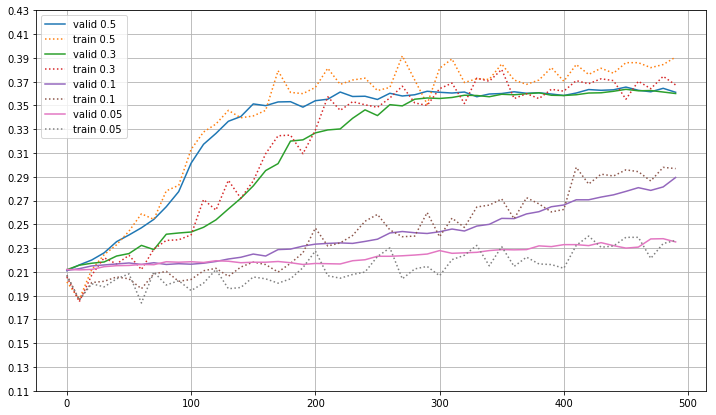

In [11]:
plt.figure(figsize=(12,7)) 
for i,model in enumerate(models):
    m = model.information
    num_iterations = list(m.keys())
    costs = [m[i][0]  for i in num_iterations]
    valid_scores = [m[i][1]  for i in num_iterations]
    train_scores = [m[i][2]  for i in num_iterations]
    plt.plot(num_iterations, valid_scores, '-', label='valid '+ str(learning_rates[i]))
    plt.plot(num_iterations, train_scores, ':', label='train '+ str(learning_rates[i]))
    plt.yticks(np.arange(0.11, 0.45, 0.02))
    ax = plt.gca()
    ax.grid(True)
    plt.legend()

## 单层，更多的隐藏层节点

In [16]:
learning_rate = 0.3
hidden_sizes = range(2, 41, 5)
n_splits = 1
ms = ShuffleSplit(n_splits=n_splits,test_size=0.2)
models_2 = []
for train_indices, valid_indices in ms.split(train_X_vec2doc):
    for hidden_size in hidden_sizes:
        train_train_X = train_X.iloc[:,train_indices]
        train_train_Y = train_Y.iloc[train_indices,:]
        train_valid_X = train_X.iloc[:,valid_indices]
        train_valid_Y = train_Y.iloc[valid_indices,:]
        mlpc = MLPClassifier(verbose=False, 
            # 忽略输入和输出层。中间层的结点数。例如 本例子为 input -> 4 -> 2（2分类）
            hidden_layer_sizes=(hidden_size,), 
            activation='relu', # 'relu', 'sigmoid'. 更多函数，等待支持
            max_iter=1000, # 迭代次数
            learning_rate_init=learning_rate, 
            warm_start=True,  # True就好了
            mini_batch='auto', # 保持auto
            step_size=10, # 多少个iteration后，才进行“输出loss”，输出“准确度”，保存模型文件，这三个操作?
            load_from_file=False, # 读文件恢复模型吗
            dump_file=False, # 要不要把模型写入文件？
            validation_set=(train_valid_X, train_valid_Y) # 要不要给一个validation set？（仅用来输出这个集合的准确度)
        )
        mlpc.fit(train_train_X, train_train_Y)
        r = mlpc.score(train_valid_X, train_valid_Y)
        models_2.append(mlpc)
        print(r)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[0] loss 0.5120897828907001
 - (2018-10-21 03:37:04)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.19125, training score 0.20520833333333333
 - (2018-10-21 03:37:05)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[10] loss 0.5023723876125168
 - (2018-10-21 03:37:05)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.19875, training score 0.20572916666666666
 - (2018-10-21 03:37:06)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[20] loss 0.5005609192554858
 - (2018-10-21 03:37:06)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.20354166666666668, training score 0.20677083333333332
 - (2018-10-21 03:37:07)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[30] loss 0.5015061356019068
 -

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.336875, training score 0.34479166666666666
 - (2018-10-21 03:37:35)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[280] loss 0.454160419574488
 - (2018-10-21 03:37:36)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3389583333333333, training score 0.33697916666666666
 - (2018-10-21 03:37:36)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[290] loss 0.44761895058961937
 - (2018-10-21 03:37:37)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.34291666666666665, training score 0.375
 - (2018-10-21 03:37:37)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[300] loss 0.4470956721061049
 - (2018-10-21 03:37:38)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.348125, tr

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[550] loss 0.44034694632255017
 - (2018-10-21 03:38:06)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3525, training score 0.36770833333333336
 - (2018-10-21 03:38:07)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[560] loss 0.4392394015229805
 - (2018-10-21 03:38:07)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.35229166666666667, training score 0.390625
 - (2018-10-21 03:38:08)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[570] loss 0.44426216760605824
 - (2018-10-21 03:38:08)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.35125, training score 0.365625
 - (2018-10-21 03:38:09)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[580] loss 0.4390916012697147
 - (2018-10-21 03:

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.351875, training score 0.3885416666666667
 - (2018-10-21 03:38:37)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[830] loss 0.44159986270509166
 - (2018-10-21 03:38:38)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.353125, training score 0.38125
 - (2018-10-21 03:38:38)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[840] loss 0.44424872206498556
 - (2018-10-21 03:38:39)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3466666666666667, training score 0.35833333333333334
 - (2018-10-21 03:38:39)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[850] loss 0.4446454172804481
 - (2018-10-21 03:38:40)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3514583333333333, 

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[100] loss 0.4878730497044722
 - (2018-10-21 03:39:11)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.25708333333333333, training score 0.290625
 - (2018-10-21 03:39:12)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[110] loss 0.48653335388125796
 - (2018-10-21 03:39:13)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.26875, training score 0.28489583333333335
 - (2018-10-21 03:39:14)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[120] loss 0.4821703491957322
 - (2018-10-21 03:39:14)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.27770833333333333, training score 0.29375
 - (2018-10-21 03:39:15)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[130] loss 0.4781079461121083
 - (201

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.35291666666666666, training score 0.3880208333333333
 - (2018-10-21 03:39:51)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[380] loss 0.43915546301781755
 - (2018-10-21 03:39:52)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.35270833333333335, training score 0.3765625
 - (2018-10-21 03:39:52)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[390] loss 0.43902576506067575
 - (2018-10-21 03:39:53)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3566666666666667, training score 0.39166666666666666
 - (2018-10-21 03:39:54)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[400] loss 0.4390783875107003
 - (2018-10-21 03:39:54)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation sc

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[650] loss 0.4293662092368302
 - (2018-10-21 03:40:30)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.36, training score 0.409375
 - (2018-10-21 03:40:31)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[660] loss 0.43029998177832113
 - (2018-10-21 03:40:32)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3491666666666667, training score 0.41041666666666665
 - (2018-10-21 03:40:32)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[670] loss 0.43712707925205524
 - (2018-10-21 03:40:33)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.35479166666666667, training score 0.4114583333333333
 - (2018-10-21 03:40:34)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[680] loss 0.4294708295623134

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[930] loss 0.42589503137582274
 - (2018-10-21 03:41:10)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.351875, training score 0.42864583333333334
 - (2018-10-21 03:41:11)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[940] loss 0.42959125173059615
 - (2018-10-21 03:41:12)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.35291666666666666, training score 0.40625
 - (2018-10-21 03:41:13)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[950] loss 0.42845977864171886
 - (2018-10-21 03:41:13)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3539583333333333, training score 0.4166666666666667
 - (2018-10-21 03:41:14)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[960] loss 0.431315508515

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3460416666666667, training score 0.35989583333333336
 - (2018-10-21 03:41:55)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[210] loss 0.4397955226197458
 - (2018-10-21 03:41:56)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.34541666666666665, training score 0.3880208333333333
 - (2018-10-21 03:41:57)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[220] loss 0.44638194853642194
 - (2018-10-21 03:41:58)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.345, training score 0.37395833333333334
 - (2018-10-21 03:41:59)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[230] loss 0.44335855717836503
 - (2018-10-21 03:41:59)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[480] loss 0.43660378603311284
 - (2018-10-21 03:42:41)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.36, training score 0.3921875
 - (2018-10-21 03:42:42)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[490] loss 0.4326402293459939
 - (2018-10-21 03:42:43)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.36020833333333335, training score 0.40989583333333335
 - (2018-10-21 03:42:44)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[500] loss 0.4301476896589474
 - (2018-10-21 03:42:45)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.36020833333333335, training score 0.40729166666666666
 - (2018-10-21 03:42:45)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[510] loss 0.43256343090145

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3566666666666667, training score 0.409375
 - (2018-10-21 03:43:27)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[760] loss 0.4307851542169435
 - (2018-10-21 03:43:28)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.360625, training score 0.40260416666666665
 - (2018-10-21 03:43:29)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[770] loss 0.4239665583431776
 - (2018-10-21 03:43:30)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.36, training score 0.42083333333333334
 - (2018-10-21 03:43:31)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[780] loss 0.4239997919280026
 - (2018-10-21 03:43:32)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.36041666666666666, tra

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[30] loss 0.5011620947417079
 - (2018-10-21 03:44:15)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.230625, training score 0.234375
 - (2018-10-21 03:44:16)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[40] loss 0.49596399270706626
 - (2018-10-21 03:44:17)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.24145833333333333, training score 0.24583333333333332
 - (2018-10-21 03:44:17)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[50] loss 0.4919377350819797
 - (2018-10-21 03:44:19)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.254375, training score 0.2635416666666667
 - (2018-10-21 03:44:19)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[60] loss 0.4867036053769957
 - (2018-1

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.35020833333333334, training score 0.4125
 - (2018-10-21 03:45:07)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[310] loss 0.4379642766239021
 - (2018-10-21 03:45:08)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.35083333333333333, training score 0.403125
 - (2018-10-21 03:45:09)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[320] loss 0.43968327122210754
 - (2018-10-21 03:45:10)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.35333333333333333, training score 0.3796875
 - (2018-10-21 03:45:11)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[330] loss 0.4411122660449757
 - (2018-10-21 03:45:12)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.351875, training 

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[580] loss 0.4333943244147535
 - (2018-10-21 03:45:59)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3570833333333333, training score 0.4078125
 - (2018-10-21 03:46:00)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[590] loss 0.4371548087334104
 - (2018-10-21 03:46:01)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3572916666666667, training score 0.3932291666666667
 - (2018-10-21 03:46:02)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[600] loss 0.4280503320229878
 - (2018-10-21 03:46:03)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.35604166666666665, training score 0.4239583333333333
 - (2018-10-21 03:46:04)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[610] loss 0.4321

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[860] loss 0.4244178089847194
 - (2018-10-21 03:46:53)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.35125, training score 0.42864583333333334
 - (2018-10-21 03:46:54)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[870] loss 0.42178069338073326
 - (2018-10-21 03:46:55)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.34770833333333334, training score 0.43072916666666666
 - (2018-10-21 03:46:56)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[880] loss 0.42281351973200204
 - (2018-10-21 03:46:57)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.34875, training score 0.43125
 - (2018-10-21 03:46:57)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[890] loss 0.41479099886879894
 - (20

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.321875, training score 0.3453125
 - (2018-10-21 03:47:49)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[140] loss 0.45898021829010055
 - (2018-10-21 03:47:50)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.32375, training score 0.35885416666666664
 - (2018-10-21 03:47:51)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[150] loss 0.45903204099773365
 - (2018-10-21 03:47:53)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.32645833333333335, training score 0.35052083333333334
 - (2018-10-21 03:47:53)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[160] loss 0.4514566893219577
 - (2018-10-21 03:47:55)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3275, training 

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[410] loss 0.42854409835220303
 - (2018-10-21 03:48:49)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3570833333333333, training score 0.40572916666666664
 - (2018-10-21 03:48:49)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[420] loss 0.44012156335445524
 - (2018-10-21 03:48:51)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3614583333333333, training score 0.39947916666666666
 - (2018-10-21 03:48:52)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[430] loss 0.4329069462902162
 - (2018-10-21 03:48:53)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3597916666666667, training score 0.39739583333333334
 - (2018-10-21 03:48:54)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[440

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.35604166666666665, training score 0.4317708333333333
 - (2018-10-21 03:49:48)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[690] loss 0.41962933217715187
 - (2018-10-21 03:49:49)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.35541666666666666, training score 0.44635416666666666
 - (2018-10-21 03:49:50)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[700] loss 0.4218647045961003
 - (2018-10-21 03:49:51)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.35520833333333335, training score 0.4505208333333333
 - (2018-10-21 03:49:52)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[710] loss 0.4231539751372996
 - (2018-10-21 03:49:53)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
vali

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[960] loss 0.41713499501526585
 - (2018-10-21 03:50:47)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.35125, training score 0.44635416666666666
 - (2018-10-21 03:50:48)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[970] loss 0.4122945147260579
 - (2018-10-21 03:50:50)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3545833333333333, training score 0.44895833333333335
 - (2018-10-21 03:50:50)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[980] loss 0.40998799119975793
 - (2018-10-21 03:50:52)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.35354166666666664, training score 0.465625
 - (2018-10-21 03:50:53)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[990] loss 0.412693317257

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3460416666666667, training score 0.38645833333333335
 - (2018-10-21 03:51:54)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[240] loss 0.439740437780823
 - (2018-10-21 03:51:55)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.34958333333333336, training score 0.3890625
 - (2018-10-21 03:51:56)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[250] loss 0.44337642818377615
 - (2018-10-21 03:51:58)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.34770833333333334, training score 0.3770833333333333
 - (2018-10-21 03:51:59)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[260] loss 0.4468859343439915
 - (2018-10-21 03:52:00)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation scor

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[510] loss 0.4337984817432726
 - (2018-10-21 03:53:02)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.36104166666666665, training score 0.4197916666666667
 - (2018-10-21 03:53:03)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[520] loss 0.4324983654929385
 - (2018-10-21 03:53:04)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.36083333333333334, training score 0.40625
 - (2018-10-21 03:53:05)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[530] loss 0.4316621452311763
 - (2018-10-21 03:53:07)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.35520833333333335, training score 0.4166666666666667
 - (2018-10-21 03:53:08)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[540] loss 0.4277

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[790] loss 0.4170907156964143
 - (2018-10-21 03:54:10)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3622916666666667, training score 0.44635416666666666
 - (2018-10-21 03:54:11)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[800] loss 0.41211223664405916
 - (2018-10-21 03:54:13)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3595833333333333, training score 0.4432291666666667
 - (2018-10-21 03:54:14)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[810] loss 0.41818882721838124
 - (2018-10-21 03:54:15)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.35875, training score 0.45208333333333334
 - (2018-10-21 03:54:16)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[820] loss 0.419

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.2972916666666667, training score 0.3171875
 - (2018-10-21 03:55:20)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[70] loss 0.4710881972498994
 - (2018-10-21 03:55:22)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.30375, training score 0.32447916666666665
 - (2018-10-21 03:55:23)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[80] loss 0.46857780481511574
 - (2018-10-21 03:55:24)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3095833333333333, training score 0.3302083333333333
 - (2018-10-21 03:55:25)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[90] loss 0.4658531061137117
 - (2018-10-21 03:55:27)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.31958333333

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[340] loss 0.43800000833609043
 - (2018-10-21 03:56:36)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.34520833333333334, training score 0.42291666666666666
 - (2018-10-21 03:56:36)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[350] loss 0.4317475175501195
 - (2018-10-21 03:56:38)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.34979166666666667, training score 0.4046875
 - (2018-10-21 03:56:39)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[360] loss 0.4351237570922234
 - (2018-10-21 03:56:41)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.35229166666666667, training score 0.40520833333333334
 - (2018-10-21 03:56:42)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[370] loss 0

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.344375, training score 0.4322916666666667
 - (2018-10-21 03:57:50)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[620] loss 0.4196022840190254
 - (2018-10-21 03:57:52)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.34770833333333334, training score 0.4453125
 - (2018-10-21 03:57:53)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[630] loss 0.4218731342629783
 - (2018-10-21 03:57:55)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.35083333333333333, training score 0.43697916666666664
 - (2018-10-21 03:57:56)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[640] loss 0.4239360251254082
 - (2018-10-21 03:57:58)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.348125

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[890] loss 0.4186148686965904
 - (2018-10-21 03:59:06)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3525, training score 0.4557291666666667
 - (2018-10-21 03:59:07)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[900] loss 0.41389243124483527
 - (2018-10-21 03:59:09)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3485416666666667, training score 0.4661458333333333
 - (2018-10-21 03:59:10)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[910] loss 0.4129225263037302
 - (2018-10-21 03:59:11)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3514583333333333, training score 0.4578125
 - (2018-10-21 03:59:12)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[920] loss 0.4158389441715769

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[170] loss 0.4547642668603161
 - (2018-10-21 04:00:28)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.32958333333333334, training score 0.3572916666666667
 - (2018-10-21 04:00:29)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[180] loss 0.44894362321976417
 - (2018-10-21 04:00:31)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.331875, training score 0.36041666666666666
 - (2018-10-21 04:00:32)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[190] loss 0.4496972032641411
 - (2018-10-21 04:00:34)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.33416666666666667, training score 0.37135416666666665
 - (2018-10-21 04:00:35)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[200] loss 0.4

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.34270833333333334, training score 0.4359375
 - (2018-10-21 04:01:50)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[450] loss 0.4367696728748312
 - (2018-10-21 04:01:52)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3464583333333333, training score 0.39427083333333335
 - (2018-10-21 04:01:53)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[460] loss 0.4300128620889421
 - (2018-10-21 04:01:55)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.3475, training score 0.41875
 - (2018-10-21 04:01:56)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[470] loss 0.4287794188154243
 - (2018-10-21 04:01:58)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.345625, training sco

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[720] loss 0.41884064331717624
 - (2018-10-21 04:03:13)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.34270833333333334, training score 0.44166666666666665
 - (2018-10-21 04:03:14)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[730] loss 0.4210431197137251
 - (2018-10-21 04:03:16)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.34, training score 0.446875
 - (2018-10-21 04:03:17)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[740] loss 0.4167799649475609
 - (2018-10-21 04:03:19)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.34541666666666665, training score 0.44635416666666666
 - (2018-10-21 04:03:20)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[750] loss 0.419954326620840

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.33958333333333335, training score 0.46770833333333334
 - (2018-10-21 04:04:35)

0.34708333333333335


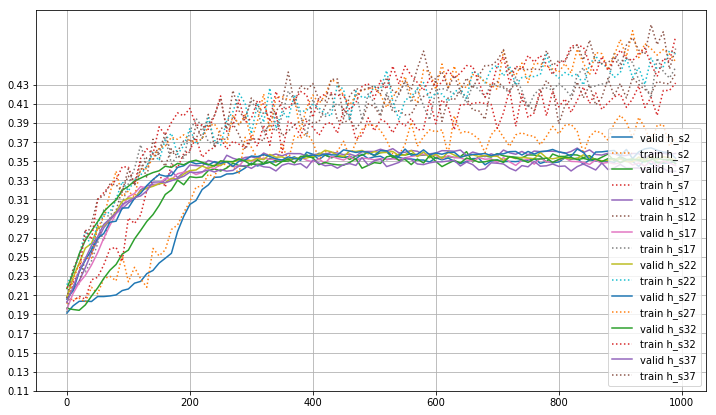

In [17]:
hidden_sizes = range(2, 41, 5)
plt.figure(figsize=(12,7)) 
for i,model in enumerate(models_2):
    m = model.information
    num_iterations = list(m.keys())
    costs = [m[i][0]  for i in num_iterations]
    valid_scores = [m[i][1]  for i in num_iterations]
    train_scores = [m[i][2]  for i in num_iterations]
    plt.plot(num_iterations, valid_scores, '-', label='valid h_s'+ str(hidden_sizes[i]))
    plt.plot(num_iterations, train_scores, ':', label='train h_s'+ str(hidden_sizes[i]))
    plt.yticks(np.arange(0.11, 0.45, 0.02))
    ax = plt.gca()
    ax.grid(True)
    plt.legend()

## 测试多层

In [13]:
models_2 = []
learning_rates = [0.5, 0.3, 0.1]
n_splits = 1
ms = ShuffleSplit(n_splits=n_splits,test_size=0.2)

for train_indices, valid_indices in ms.split(train_X_vec2doc):
    for learning_rate in learning_rates:
        train_train_X = train_X.iloc[:,train_indices]
        train_train_Y = train_Y.iloc[train_indices,:]
        train_valid_X = train_X.iloc[:,valid_indices]
        train_valid_Y = train_Y.iloc[valid_indices,:]
        mlpc = MLPClassifier(verbose=False, 
            # 忽略输入和输出层。中间层的结点数。例如 本例子为 input -> 8 -> 4 -> 2（2分类）
            hidden_layer_sizes=(8,4), 
            activation='relu', # 'relu', 'sigmoid'. 更多函数，等待支持
            max_iter=500, # 迭代次数
            learning_rate_init=learning_rate, 
            warm_start=True,  # True就好了
            mini_batch='auto', # 保持auto
            step_size=10, # 多少个iteration后，才进行“输出loss”，输出“准确度”，保存模型文件，这三个操作?
            load_from_file=False, # 读文件恢复模型吗
            dump_file=False, # 要不要把模型写入文件？
            validation_set=(train_valid_X, train_valid_Y) # 要不要给一个validation set？（仅用来输出这个集合的准确度)
        )
        mlpc.fit(train_train_X, train_train_Y)
        r = mlpc.score(train_valid_X, train_valid_Y)
        models_2.append(mlpc)
        print(r)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[0] loss 0.5106734906927922
 - (2018-10-21 03:21:25)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.2, training score 0.20729166666666668
 - (2018-10-21 03:21:26)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[10] loss 0.5022262239297658
 - (2018-10-21 03:21:27)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.20229166666666668, training score 0.20677083333333332
 - (2018-10-21 03:21:28)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[20] loss 0.5011230536835057
 - (2018-10-21 03:21:28)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 225 - 
validation score 0.20479166666666668, training score 0.20572916666666666
 - (2018-10-21 03:21:29)

[INFO] multilayer_perceptron multilayer_perceptron.py - __train line 207 - 
[30] loss 0.50048647913

/BIGDATA1/nsccgz_yfdu_1/asc19/wyf/0code/mylearn/metrics/logistic_function.py:32: RuntimeWarning: invalid value encountered in true_divide
  return npexp / s
/BIGDATA1/nsccgz_yfdu_1/asc19/wyf/0code/mylearn/neural_network/multilayer_perceptron.py:345: RuntimeWarning: invalid value encountered in greater
  ai = np.where(ai > 1-1e-5, 1-1e-5, ai)
/BIGDATA1/nsccgz_yfdu_1/asc19/wyf/0code/mylearn/neural_network/multilayer_perceptron.py:346: RuntimeWarning: invalid value encountered in less
  ai = np.where(ai < 1e-5, 1e-5, ai)


AssertionError: 

In [14]:
plt.figure(figsize=(12,7)) 
for i,model in enumerate(models_2):
    m = model.information
    num_iterations = list(m.keys())
    costs = [m[i][0]  for i in num_iterations]
    valid_scores = [m[i][1]  for i in num_iterations]
    train_scores = [m[i][2]  for i in num_iterations]
    plt.plot(num_iterations, valid_scores, '-', label='valid '+ str(learning_rates[i]))
    plt.plot(num_iterations, train_scores, ':', label='train '+ str(learning_rates[i]))
    plt.yticks(np.arange(0.11, 0.45, 0.02))
    ax = plt.gca()
    ax.grid(True)
    plt.legend()

<Figure size 864x504 with 0 Axes>

## 测试单层节点数变化